# HR Analytics - Employee Attrition

### Muhammad Rizky Farhan

**Dataset:** HR Analytics Case Study | **Source:** [kaggle.com](https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study?select=general_data.csv)

**Problem**

A large company named XYZ employs around 4000 employees. However, every year around 15% of it's employees leave the company and needs to be replaced. The management believes that this level of attrition (employees leaving) is bad for the company. Hence the management wanted to understand what factors they should focus on in order to make their employees stay and what factors need to be addressed right away.

**Goal**

Identify what are the most significant factors affecting attrition and making a model to predict new employees attrition.

### I. Importing Data & Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('clean_data.csv')

In [3]:
data.head()

,EmployeeID,Age,Gender,MaritalStatus,Education,EducationField,Department,JobRole,JobLevel,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,Female,Married,College,Life Sciences,Sales,Healthcare Representative,1,131160,...,6,1,0,0,High,Very High,Good,High,Excellent,No
1,2,31,Female,Single,Below College,Life Sciences,Research & Development,Research Scientist,1,41890,...,3,5,1,4,High,Medium,Best,Medium,Outstanding,Yes
2,3,32,Male,Married,Master,Other,Research & Development,Sales Executive,4,193280,...,2,5,0,3,Medium,Medium,Bad,High,Excellent,No
3,4,38,Male,Married,Doctor,Life Sciences,Research & Development,Human Resources,3,83210,...,5,8,7,5,Very High,Very High,Better,Medium,Excellent,No
4,5,32,Male,Single,Below College,Medical,Research & Development,Sales Executive,1,23420,...,2,6,0,4,Very High,Low,Better,High,Excellent,No


### II. Exploratory Data Analysis (EDA)

In this first step, exploratory data analysis is used in order to understand and identify insights from the data. The process will include several analysis and visualization of the features in the dataset. From the insights identified will then be  decided if there needs to be further analysis that needs to be done before building the model.

### II.1 Data Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Gender                   4300 non-null   object 
 3   MaritalStatus            4300 non-null   object 
 4   Education                4300 non-null   object 
 5   EducationField           4300 non-null   object 
 6   Department               4300 non-null   object 
 7   JobRole                  4300 non-null   object 
 8   JobLevel                 4300 non-null   int64  
 9   MonthlyIncome            4300 non-null   int64  
 10  BusinessTravel           4300 non-null   object 
 11  DistanceFromHome         4300 non-null   int64  
 12  PercentSalaryHike        4300 non-null   int64  
 13  StockOptionLevel         4300 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.describe()

,EmployeeID,Age,JobLevel,MonthlyIncome,DistanceFromHome,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,36.926977,2.066977,65059.844186,9.197907,15.210698,0.795349,2.690000,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,9.146517,1.106633,47045.398914,8.097059,3.662777,0.853534,2.495764,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,18.000000,1.000000,10090.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,30.000000,1.000000,29260.000000,2.000000,12.000000,0.000000,1.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,36.000000,2.000000,49360.000000,7.000000,14.000000,1.000000,2.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,43.000000,3.000000,83802.500000,14.000000,18.000000,1.000000,4.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,60.000000,5.000000,199990.000000,29.000000,25.000000,3.000000,9.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
listItem = []

for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum())/len(data[col])), 
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,EmployeeID,int64,0,0.0,4300,"[241, 820]"
1,Age,int64,0,0.0,43,"[39, 55]"
2,Gender,object,0,0.0,2,"[Male, Female]"
3,MaritalStatus,object,0,0.0,3,"[Single, Married]"
4,Education,object,0,0.0,5,"[Below College, Doctor]"
5,EducationField,object,0,0.0,6,"[Medical, Other]"
6,Department,object,0,0.0,3,"[Research & Development, Sales]"
7,JobRole,object,0,0.0,9,"[Research Director, Manager]"
8,JobLevel,int64,0,0.0,5,"[2, 3]"
9,MonthlyIncome,int64,0,0.0,1349,"[27430, 148140]"


The dataset is identified to be clean with no null values and each of the features have been set to the correct datatypes. There are also no anomalies in the values of the features in the dataset.

**The dataset consists of 4300  with 25 columns, that comes from 3 different sources, which are:**
1. General Data (20 Columns)
    - Employee ID
    - Age
    - Gender
    - Marital Status
    - Education
    - Education Field
    - Department
    - Job Role
    - Job Level
    - Monthly Income
    - Business Travel
    - Distance from Home
    - Percent Salary Hike
    - Stock Option Level (rights to buy company's stocks)
    - Numbers of Companies Worked with
    - Total Working Years
    - Training Times Last Year
    - Years at Company
    - Years Since Last Promotion
    - Years with Current Manager
    - Attrition (employee leaving)
2. Employee Survey Data (3 Columns)
    - Environment Satisfaction
    - Job Satisfaction
    - Work-Life Balance
3. Manager Survey Data (2 Columns)
    - Job Involvement
    - Performance Rating

### II.2 Correlation

There have been found that some of the features have fairly high positive correlation between each other. The features being:
- `Age` with `TotalWorkingYears`
- `TotalWorkingYears` with `YearsAtCompany`
- `YearsAtCompany` with `YearsSinceLastPromotion` and `YearsWithCurrentManager`
- `YearsSinceLastPromotion` with `YearsWithCurrentManager`

All of the features identified with correlation have values of years, which explains why they are related. When the year passes, the features that have years as their values will also will definitely be affected.

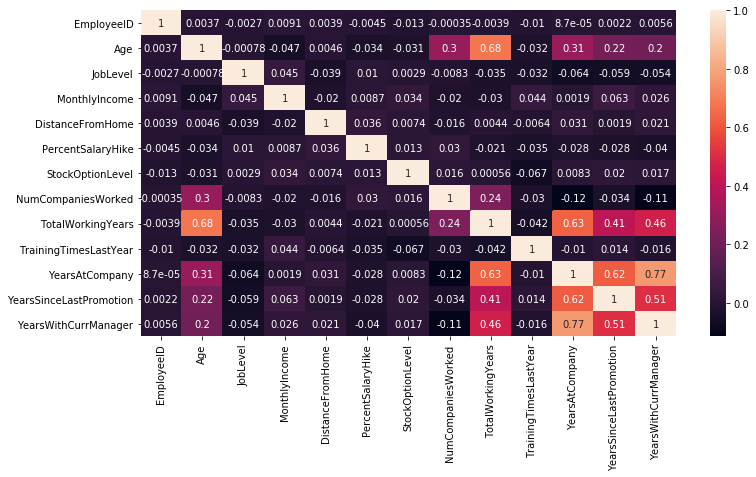

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot = True)

### II.3 Data Visualization
To further understood the data, visualizations with graphs will be made. This is done to get a better view of the data as well as the values inside each of the columns in the dataset.

In [8]:
data.columns

Index(['EmployeeID', 'Age', 'Gender', 'MaritalStatus', 'Education',
       'EducationField', 'Department', 'JobRole', 'JobLevel', 'MonthlyIncome',
       'BusinessTravel', 'DistanceFromHome', 'PercentSalaryHike',
       'StockOptionLevel', 'NumCompaniesWorked', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

### II.3.1 Personal Related
includes `Age`, `Gender`, `MaritalStatus`, and `DistanceFromHome`

### Age

In [9]:
print('Age has a range from {} to {}'.format(min(data['Age']), max(data['Age'])))

Age has a range from 18 to 60


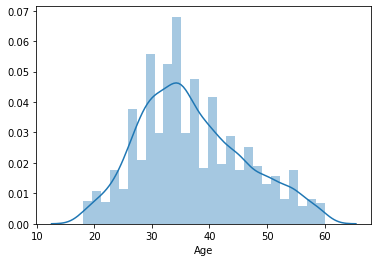

In [10]:
sns.distplot(data['Age'])

In [11]:
from scipy.stats import anderson
anderson(data['Age'],'norm')
# critical value > significance level = bukan normal

AndersonResult(statistic=29.532789021406643, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Gender and MaritalStatus

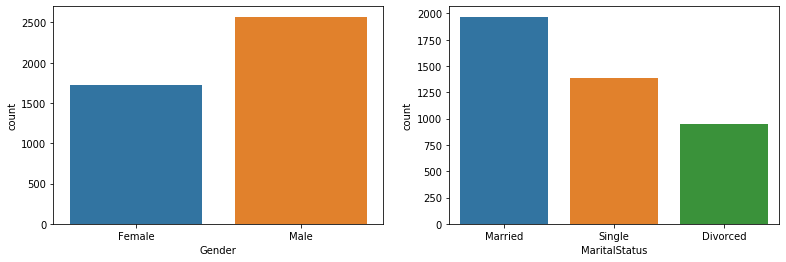

In [12]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(data['Gender'])
plt.subplot(1,2,2)
sns.countplot(data['MaritalStatus'])

### DistanceFromHome

In [13]:
print('Distance from home has a range from {} to {}'.format(min(data['DistanceFromHome']), max(data['DistanceFromHome'])))

Distance from home has a range from 1 to 29


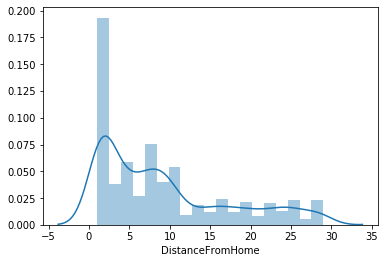

In [14]:
sns.distplot(data['DistanceFromHome'])

### II.3.2 Education Related
includes `Education` and `EducationField`

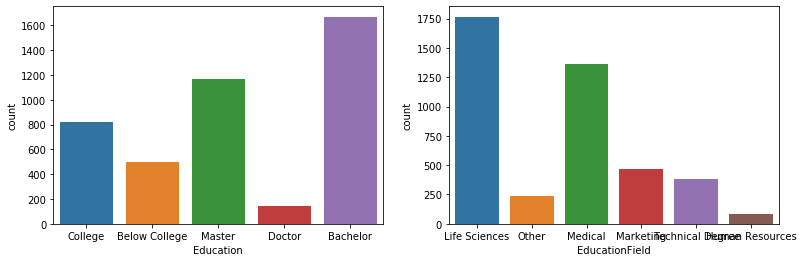

In [15]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(data['Education'])
plt.subplot(1,2,2)
sns.countplot(data['EducationField'])

### II.3.3 Job Related
includes `Department`, `JobRole`, `JobLevel`, and `BusinessTravel`

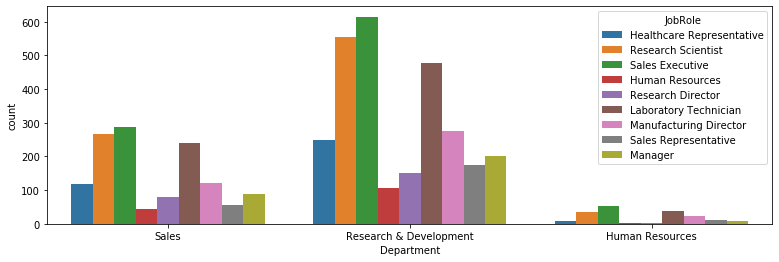

In [16]:
plt.figure(figsize=(13,4))
sns.countplot(data['Department'], hue=data['JobRole'])

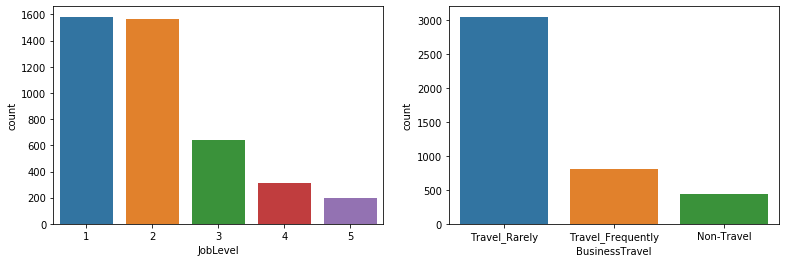

In [17]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(data['JobLevel'])
plt.subplot(1,2,2)
sns.countplot(data['BusinessTravel'])

### II.3.4 Salary Related
Includes `MonthlyIncome`, `PercentSalaryHike`, and `StockOptionLevel`

In [18]:
print('Monthly income has a range from {} to {}'.format(min(data['MonthlyIncome']), max(data['MonthlyIncome'])))

Monthly income has a range from 10090 to 199990


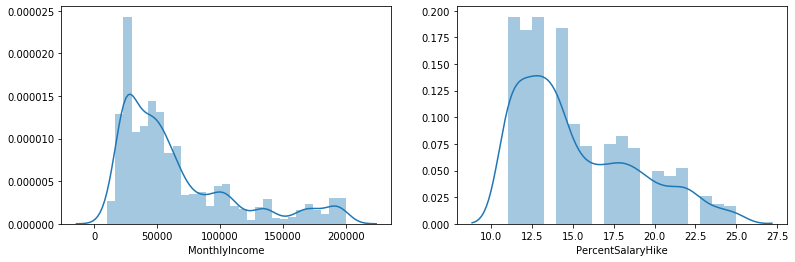

In [19]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(data['MonthlyIncome'])
plt.subplot(1,2,2)
sns.distplot(data['PercentSalaryHike'])

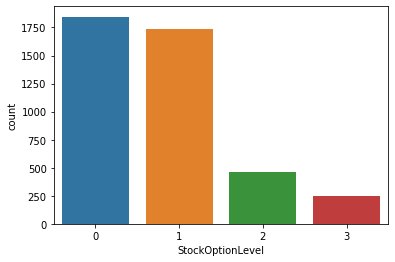

In [20]:
sns.countplot(data['StockOptionLevel'])

### II.3.5 Company Related
Includes `NumCompaniesWorked`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsSinceLastPromotion`, and `YearsWithCurrManager`

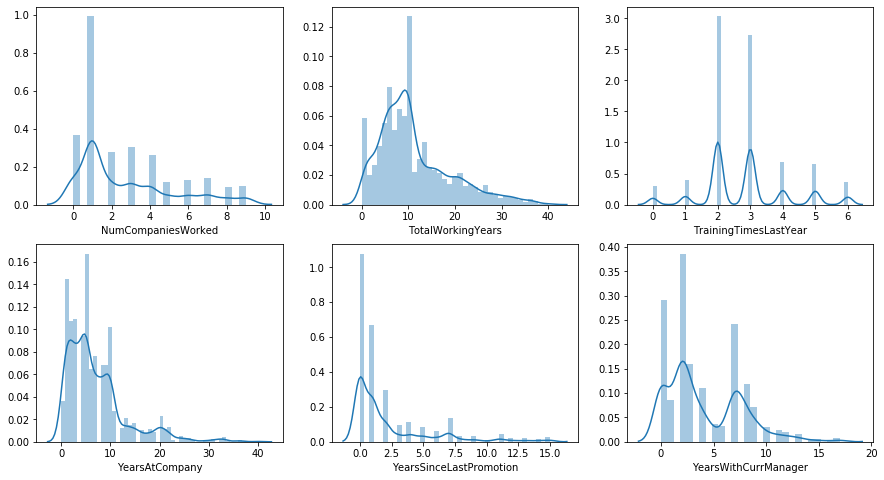

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(data['NumCompaniesWorked'])
plt.subplot(2,3,2)
sns.distplot(data['TotalWorkingYears'])
plt.subplot(2,3,3)
sns.distplot(data['TrainingTimesLastYear'])
plt.subplot(2,3,4)
sns.distplot(data['YearsAtCompany'])
plt.subplot(2,3,5)
sns.distplot(data['YearsSinceLastPromotion'])
plt.subplot(2,3,6)
sns.distplot(data['YearsWithCurrManager'])

### II.3.6 Job Survey Related
Includes `EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`, `JobInvolvement`, and `PerformanceRating`

### Employee Survey

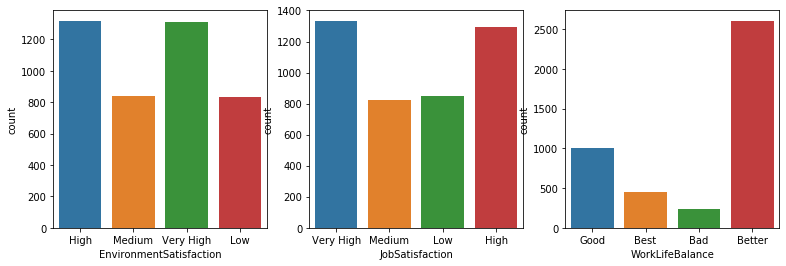

In [22]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.countplot(data['EnvironmentSatisfaction'])
plt.subplot(1,3,2)
sns.countplot(data['JobSatisfaction'])
plt.subplot(1,3,3)
sns.countplot(data['WorkLifeBalance'])

### Manager Survey

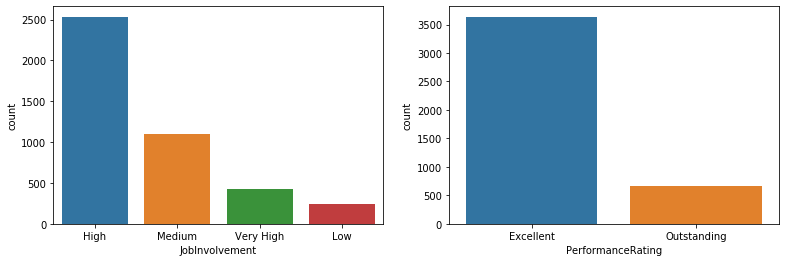

In [23]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(data['JobInvolvement'])
plt.subplot(1,2,2)
sns.countplot(data['PerformanceRating'])

### II.3.7 Attrition

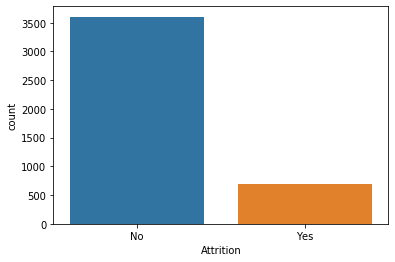

In [24]:
sns.countplot(data['Attrition'])

In [25]:
print('Percentage of Yes Attrition: {}%'.format(round(len(data[data['Attrition'] == 'Yes']) / len(data) * 100, 3)))
print('Percentage of Yes Attrition: {}%'.format(round(len(data[data['Attrition'] == 'No']) / len(data) * 100, 3)))

Percentage of Yes Attrition: 16.163%
Percentage of Yes Attrition: 83.837%


### III. Feature Selection
After conducting exploratory data analysis, the next step is to continue to the feature selection process. Feature selection is a process of selecting a subset of features that are going to be used in model building.

### Target Feature (Y)
The feature `Attrition` will be used for our target feature, because from the goal stated, we would like to identify what factors are affecting the attrition.

In [26]:
data['Attrition'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Attrition, dtype: object

### Train Feature (X)
The rest of the feature besides `EmployeeID` and `Attrition` in the dataset will be used for our train feature, because the company would like to analyze all of the factors from the data that have been gathered.

In [27]:
data.drop(['EmployeeID', 'Attrition'], axis = 1).head()

,Age,Gender,MaritalStatus,Education,EducationField,Department,JobRole,JobLevel,MonthlyIncome,BusinessTravel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Female,Married,College,Life Sciences,Sales,Healthcare Representative,1,131160,Travel_Rarely,...,1.0,6,1,0,0,High,Very High,Good,High,Excellent
1,31,Female,Single,Below College,Life Sciences,Research & Development,Research Scientist,1,41890,Travel_Frequently,...,6.0,3,5,1,4,High,Medium,Best,Medium,Outstanding
2,32,Male,Married,Master,Other,Research & Development,Sales Executive,4,193280,Travel_Frequently,...,5.0,2,5,0,3,Medium,Medium,Bad,High,Excellent
3,38,Male,Married,Doctor,Life Sciences,Research & Development,Human Resources,3,83210,Non-Travel,...,13.0,5,8,7,5,Very High,Very High,Better,Medium,Excellent
4,32,Male,Single,Below College,Medical,Research & Development,Sales Executive,1,23420,Travel_Rarely,...,9.0,2,6,0,4,Very High,Low,Better,High,Excellent


### IV. Data Preprocessing
In data preprocessing, the insights that were found in exploratory data analysis is then continued by doing further analysis. This process is done to ensure that the data that we have will be ready to be used in model building.

### IV.1 Feature Engineering
Due to some of the features are categorical datas, feature engineering is conducted to change the datatype into numerical values. The categorical features that will be changed into numerical datas are `Gender`, `MaritalStatus`, `Education`, `EducationField`, `Department`, `JobRole`, `BusinessTravel`, `EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`, `JobInvolvement`, `PerformanceRating`, and `Attrition`.

In [28]:
def ChangeLabel(col, ul):
    temp = []
    for i in range(len(data)):
        for j in range(len(ul)):
            if data[col][i] == ul[j]:
                temp.append(j)
            else:
                pass
    data[col] = temp
    temp = []

In [29]:
ChangeLabel('Gender', ['Male', 'Female'])
ChangeLabel('MaritalStatus', ['Single', 'Married','Divorced'])
ChangeLabel('Education', ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
ChangeLabel('EducationField', data['EducationField'].unique())
ChangeLabel('Department', data['Department'].unique())
ChangeLabel('JobRole', data['JobRole'].unique())
ChangeLabel('BusinessTravel', ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
ChangeLabel('EnvironmentSatisfaction', ['Low', 'Medium', 'High', 'Very High'])
ChangeLabel('JobSatisfaction', ['Low', 'Medium', 'High', 'Very High'])
ChangeLabel('WorkLifeBalance', ['Bad', 'Better', 'Good', 'Best'])
ChangeLabel('JobInvolvement', ['Low', 'Medium', 'High', 'Very High'])
ChangeLabel('PerformanceRating', ['Excellent', 'Outstanding'])
ChangeLabel('Attrition', ['No', 'Yes'])

In [30]:
data.head()

,EmployeeID,Age,Gender,MaritalStatus,Education,EducationField,Department,JobRole,JobLevel,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,1,1,1,0,0,0,1,131160,...,6,1,0,0,2,3,2,2,0,0
1,2,31,1,0,0,0,1,1,1,41890,...,3,5,1,4,2,1,3,1,1,1
2,3,32,0,1,3,1,1,2,4,193280,...,2,5,0,3,1,1,0,2,0,0
3,4,38,0,1,4,0,1,3,3,83210,...,5,8,7,5,3,3,1,1,0,0
4,5,32,0,0,0,2,1,2,1,23420,...,2,6,0,4,3,0,1,2,0,0


### IV.2 Fixing Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated with one another. Multicollinearity could occur when new variables are created which are dependent on other variables.

In [31]:
x = data.drop(['EmployeeID', 'Attrition'], axis = 1)

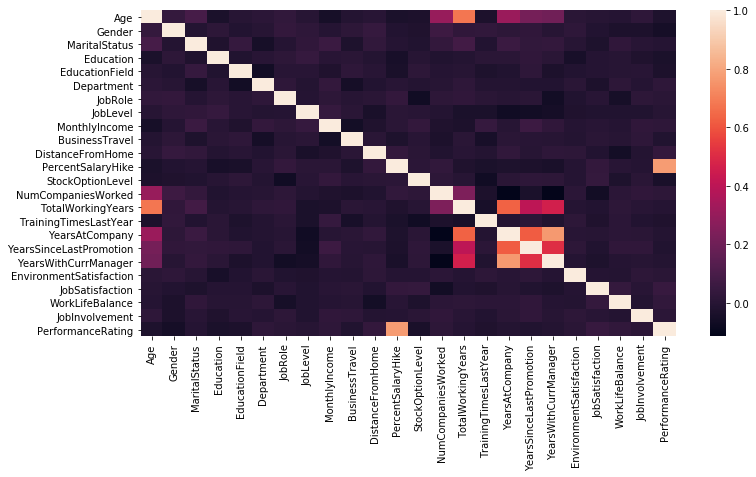

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(x.corr())

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [34]:
calc_vif(x)

,variables,VIF
0,Age,28.635671
1,Gender,1.704618
2,MaritalStatus,2.563984
3,Education,4.321314
4,EducationField,2.037689
5,Department,2.913555
6,JobRole,2.960325
7,JobLevel,4.426957
8,MonthlyIncome,2.938616
9,BusinessTravel,4.944114


In [35]:
x_alt = x.drop(['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsWithCurrManager', 'JobInvolvement'], axis = 1)
calc_vif(x_alt)

,variables,VIF
0,Gender,1.679652
1,MaritalStatus,2.458885
2,Education,4.064102
3,EducationField,1.998883
4,Department,2.777370
5,JobRole,2.788699
6,JobLevel,4.092385
7,MonthlyIncome,2.824310
8,BusinessTravel,4.501551
9,DistanceFromHome,2.208713


In [36]:
data = data.drop(['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsWithCurrManager', 'JobInvolvement'], axis = 1)

In [37]:
data.head()

,EmployeeID,Gender,MaritalStatus,Education,EducationField,Department,JobRole,JobLevel,MonthlyIncome,BusinessTravel,DistanceFromHome,StockOptionLevel,NumCompaniesWorked,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,Attrition
0,1,1,1,1,0,0,0,1,131160,1,6,0,1.0,0,2,3,2,0,0
1,2,1,0,0,0,1,1,1,41890,2,10,1,0.0,1,2,1,3,1,1
2,3,0,1,3,1,1,2,4,193280,2,17,3,1.0,0,1,1,0,0,0
3,4,0,1,4,0,1,3,3,83210,0,2,3,3.0,7,3,3,1,0,0
4,5,0,0,0,2,1,2,1,23420,1,10,2,4.0,0,3,0,1,0,0


### IV.3 Export to CSV
After doing modifications, the data will be saved as a new csv type file. This is done so it can be easily imported when it's going to be used in the next process which is model building.

In [38]:
data.to_csv('labeled_data.csv', index=False)